# Введение в квантовую коррекцию ошибок с помощью повторяющегося кода

## Введение

Квантовые вычисления требуют от нас кодирования информации в кубитах. Большинство квантовых алгоритмов, разработанных за последние несколько десятилетий, предполагали, что эти кубиты совершенны: их можно подготовить в любом желаемом состоянии и манипулировать ими с абсолютной точностью. Кубиты, которые подчиняются этим предположениям, часто называют *логическими кубитами* .

За последние несколько десятилетий также были достигнуты большие успехи в поиске физических систем, которые ведут себя как кубиты, при этом постоянно разрабатываются кубиты более высокого качества. Тем не менее, недостатки никогда не могут быть устранены полностью. Эти кубиты всегда будут слишком неточными, чтобы служить непосредственно логическими кубитами. Вместо этого мы называем их *физическими кубитами* .

В нынешнюю эпоху квантовых вычислений мы стремимся использовать физические кубиты, несмотря на их несовершенство, путем разработки собственных алгоритмов и использования эффектов уменьшения ошибок. Однако для будущей эры отказоустойчивости мы должны найти способы построения логических кубитов из физических кубитов. Это будет сделано с помощью процесса квантовой коррекции ошибок, при котором логические кубиты кодируются в большом количестве физических кубитов. Кодирование поддерживается за счет постоянного пропускания физических кубитов через сильно запутанную схему. Вспомогательные степени свободы также постоянно измеряются, чтобы обнаруживать признаки ошибок и устранять их последствия. Операции с логическими кубитами, необходимые для реализации квантовых вычислений, будут выполняться путем внесения в эту процедуру небольших возмущений.

Из-за огромного количества усилий, необходимых для этого процесса, большинство операций, выполняемых в отказоустойчивых квантовых компьютерах, будут выполняться для обнаружения и исправления ошибок. Поэтому при оценке нашего прогресса в области отказоустойчивых квантовых вычислений мы должны отслеживать, насколько хорошо наши устройства выполняют коррекцию ошибок.

В этой главе мы рассмотрим конкретный пример исправления ошибок: повторяющийся код. Хотя это и не настоящий пример квантовой коррекции ошибок — он использует физические кубиты для кодирования логического *бита* , а не кубита, — он служит простым руководством по всем основным понятиям любого кода квантовой коррекции ошибок. Мы также увидим, как его можно запустить на текущих устройствах-прототипах.

## Введение в код повторения

### Основы исправления ошибок

Основные идеи исправления ошибок для квантовой информации те же, что и для классической информации. Это позволяет нам начать с рассмотрения очень простого примера: разговора по телефону. Если кто-то задает вам вопрос, на который можно ответить «да» или «нет», ваш ответ будет зависеть от двух факторов:

- Насколько важно, чтобы вас правильно поняли?
- Насколько хороша ваша связь?

Оба они могут быть параметризованы вероятностями. Во-первых, мы можем использовать $P_a$, максимально допустимую вероятность быть неправильно понятым. Если вас просят подтвердить предпочтения вкусов мороженого, и вы не слишком возражаете, если вы получите ваниль, а не шоколад, $P_a$ может быть довольно высоким. Однако, если вам задают вопрос, от которого зависит чья-то жизнь, $P_a$ будет намного ниже.

Для второго мы можем использовать $p$, вероятность того, что ваш ответ искажен плохим соединением. Для простоты представим случай, когда искаженное «да» звучит не просто как ерунда, а как «нет». И точно так же «нет» превращается в «да». Тогда $p$ — это вероятность того, что вас неправильно поняли.

Хорошая связь или относительно неважный вопрос приведут к $p&lt;P_a$. В этом случае можно просто ответить самым прямым образом: вы просто говорите «да» или «нет».

Если же у вас плохое соединение и ваш ответ важен, у нас будет $p&gt;P_a$. Одного «да» или «нет» в данном случае недостаточно. Вероятность быть неправильно понятым будет слишком высока. Вместо этого мы должны кодировать наш ответ в более сложной структуре, позволяя получателю расшифровать наш смысл, несмотря на возможность искажения сообщения. Самый простой способ — тот, который многие сделали бы не задумываясь: просто повторите ответ много раз. Например, скажите «да, да, да» вместо «да» или «нет, нет, нет» вместо «нет».

Если в этом случае получатель услышит «да, да, да», он, конечно, решит, что отправитель имел в виду «да». Если они услышат «нет, да, да», «да, нет, да» или «да, да, нет», они, вероятно, сделают один и тот же вывод, поскольку в ответе больше позитива, чем негатива. Чтобы быть неправильно понятым в этом случае, по крайней мере два ответа должны быть искажены. Вероятность этого $P$ будет меньше $p$. Таким образом, при таком кодировании сообщение становится более вероятным для понимания. В приведенной ниже ячейке кода показан пример этого.

In [1]:
p1 = 0.01
p3 = 3 * p1**2 * (1-p1) + p1**3 # probability of 2 or 3 errors
print('Probability of a single reply being garbled: {}'.format(p1))
print('Probability of a the majority of three replies being garbled: {:.4f}'.format(p3))

Probability of a single reply being garbled: 0.01
Probability of a the majority of three replies being garbled: 0.0003


Если $P&lt;P_a$, этот метод решает нашу проблему. Если нет, мы можем просто добавить больше повторений. Тот факт, что $P&lt;p$ приведен выше, объясняется тем фактом, что нам нужно исказить как минимум два ответа, чтобы изменить большинство, поэтому даже наиболее вероятные варианты имеют вероятность $\sim p^2$. Для пяти повторений нам нужно было бы исказить как минимум три ответа, чтобы перевернуть большинство, что происходит с вероятностью $\sim p^3$. Значение $P$ в этом случае будет еще ниже. Действительно, по мере увеличения количества повторений $P$ будет уменьшаться экспоненциально. Независимо от того, насколько плоха связь или насколько мы должны быть уверены в правильности передачи нашего сообщения, мы можем добиться этого, просто повторив свой ответ достаточное количество раз.

Хотя это простой пример, он содержит все аспекты исправления ошибок.

- Есть некоторая информация, которую нужно отправить или сохранить: в этом случае «да» или «нет».
- Информация кодируется в более крупной системе для защиты от шума: в данном случае путем повторения сообщения.
- Информация, наконец, декодируется, смягчая влияние шума: в этом случае, доверяя большинству передаваемых сообщений.

Эту же схему кодирования можно использовать и для двоичного кода, просто заменив «да» и «нет» на `0` и `1` . Поэтому его также можно легко обобщить на кубиты, используя состояния $\left|0\right\rangle$ и $\left|1\right\rangle$. В каждом случае он известен как *код повторения* . Многие другие формы кодирования также возможны как в классическом, так и в квантовом случаях, которые во многих отношениях превосходят код с повторением. Однако его статус простейшей кодировки позволяет использовать его в определенных приложениях. Один из них используется в Qiskit как первый и самый простой тест реализации идей, лежащих в основе квантовой коррекции ошибок.

### Исправление ошибок в кубитах

Теперь мы реализуем эти идеи явно с помощью Qiskit. Чтобы увидеть эффекты несовершенных кубитов, мы просто можем использовать кубиты прототипов устройств. Мы также можем воспроизвести эффекты в симуляциях. Для этого функция ниже создает простую модель шума. Они выходят за рамки рассмотренного ранее простого случая единичного шумового события, которое происходит с вероятностью $p$. Вместо этого мы рассмотрим две формы ошибок, которые могут возникнуть. Одна из них — ошибка ворот: несовершенство любой операции, которую мы выполняем. Мы моделируем это здесь простым способом, используя так называемый деполяризующий шум. Результатом этого будет замена состояния любого кубита с вероятностью $p_{gate}$ полностью случайным состоянием. Для двух кубитовых вентилей он применяется независимо к каждому кубиту. Другая форма шума предназначена для измерений. Это просто переключение между `0` и `1` и наоборот непосредственно перед измерением с вероятностью $p_{meas}$.

In [2]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

def get_noise(p_meas,p_gate):

    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

Теперь мы создадим такую модель шума с вероятностью $1%$ для каждого типа ошибки.

In [3]:
noise_model = get_noise(0.01,0.01)

Давайте посмотрим, как это повлияет на попытку сохранить `0` , используя три кубита в состоянии $\left|0\right\rangle$. Мы повторим процесс `shots=1024` раза, чтобы увидеть, насколько вероятны разные результаты.

In [4]:
from qiskit import QuantumCircuit, execute, Aer

qc0 = QuantumCircuit(3,3,name='0') # initialize circuit with three qubits in the 0 state

qc0.measure(qc0.qregs[0],qc0.cregs[0]) # measure the qubits

# run the circuit with th noise model and extract the counts
counts = execute( qc0, Aer.get_backend('qasm_simulator'),noise_model=noise_model).result().get_counts()

print(counts)

{'000': 992, '001': 6, '010': 18, '100': 8}


Здесь мы видим, что почти все результаты по-прежнему получаются `'000'` , как если бы не было шума. Из оставшихся возможностей наиболее вероятны те, у которых большинство `0` . Всего выходит гораздо меньше 10 проб с большинством в `1` с. При использовании этой схемы для кодирования `0` это означает, что $P&lt;1%$

Теперь давайте попробуем то же самое для хранения `1` , используя три кубита в состоянии $\left|1\right\rangle$.

In [5]:
qc1 = QuantumCircuit(3, 3, name='0') # initialize circuit with three qubits in the 0 state
qc1.x(qc1.qregs[0]) # flip each 0 to 1

qc1.measure(qc1.qregs[0],qc1.cregs[0]) # measure the qubits

# run the circuit with th noise model and extract the counts
counts = execute(qc1, Aer.get_backend('qasm_simulator'),noise_model=noise_model).result().get_counts()

print(counts)

{'011': 16, '101': 13, '110': 16, '111': 979}


Количество выборок, большинство из которых находится в неправильном состоянии (в данном случае `0` ), снова намного меньше 10, поэтому $P&lt;1%$. Независимо от того, храним ли мы `0` или `1` , мы можем получить информацию с меньшей вероятностью ошибки, чем любой из наших источников шума.

Это было возможно потому, что рассматриваемый нами шум был относительно слабым. Чем больше мы увеличиваем $p_{meas}$ и $p_{gate}$, тем выше будет вероятность $P$. Крайним случаем этого является то, что любой из них имеет шанс $ 50/50 $ применить ошибку переворота бита, `x` . Например, запустим ту же схему, что и раньше, но с $p_{meas}=0,5$ и $p_{gate}=0$.

In [6]:
noise_model = get_noise(0.5,0.0)
counts = execute(qc1, Aer.get_backend('qasm_simulator'),noise_model=noise_model).result().get_counts()
print(counts)

{'000': 127, '001': 123, '010': 133, '011': 152, '100': 117, '101': 122, '110': 118, '111': 132}


При таком шуме все исходы происходят с равной вероятностью, а различия в результатах обусловлены только статистическим шумом. Никаких следов закодированного состояния не остается. Это важный момент, который следует учитывать при исправлении ошибок: иногда шум слишком силен, чтобы его можно было исправить. Оптимальный подход состоит в том, чтобы совместить хороший способ кодирования необходимой вам информации с аппаратным обеспечением, шум которого не слишком велик.

### Хранение кубитов

До сих пор мы рассматривали случаи, когда между кодированием и декодированием нет задержки. Для кубитов это означает, что между инициализацией схемы и проведением окончательных измерений не проходит значительного времени.

Однако во многих случаях будет значительная задержка. В качестве очевидного примера можно захотеть закодировать квантовое состояние и сохранить его в течение длительного времени, как квантовый жесткий диск. Менее очевидный, но гораздо более важный пример — само выполнение отказоустойчивых квантовых вычислений. Для этого нам нужно хранить квантовые состояния и сохранять их целостность во время вычислений. Это также должно быть сделано таким образом, чтобы мы могли манипулировать сохраненной информацией любым способом, который нам нужен, и который исправляет любые ошибки, которые мы можем внести при выполнении манипуляций.

Во всех случаях нам нужно учитывать тот факт, что ошибки возникают не только тогда, когда что-то происходит (например, вентиль или измерение), они также возникают, когда кубиты простаивают. Такой шум связан с тем, что кубиты взаимодействуют друг с другом и своим окружением. Чем дольше мы оставляем наши кубиты без дела, тем сильнее становится влияние этого шума. Если мы оставим их на достаточно долгое время, мы столкнемся с ситуацией, похожей на случай $p_{meas}=0,5$ выше, когда шум слишком силен для надежного исправления ошибок.

Решение состоит в том, чтобы постоянно измерять. Ни один кубит не остается без дела слишком долго. Вместо этого из системы постоянно извлекается информация для отслеживания возникших ошибок.

В случае классической информации, когда мы просто хотим сохранить `0` или `1` , это можно сделать, просто постоянно измеряя значение каждого кубита. Отслеживая, когда значения изменяются из-за шума, мы можем легко вывести историю возникновения ошибок.

Однако для квантовой информации это не так просто. Например, рассмотрим случай, когда мы хотим закодировать логическое состояние $\left|+\right\rangle$. Наша кодировка такова, что

$$\left|0\right\rangle \rightarrow \left|000\right\rangle, \left|1\right\rangle \rightarrow \left|111\right\rangle.$$

Поэтому для кодирования логического состояния $\left|+\right\rangle$ нам нужно

$$\left|+\right\rangle =\frac{1}{\sqrt{2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\rightarrow\frac{ 1}{\sqrt{2}}\left(\left|000\right\rangle+\left|111\right\rangle\right).$$

При используемом кодировании с повторением измерение az (которое различает состояния $\left|0\right\rangle$ и $\left|1\right\rangle$) логического кубита выполняется с использованием измерения az каждого физический кубит. Окончательный результат логического измерения декодируется из результатов измерения физических кубитов простым просмотром того, какой из выходных данных находится в большинстве.

Как упоминалось ранее, мы можем отслеживать ошибки в логических кубитах, которые хранятся в течение длительного времени, постоянно выполняя измерения z физических кубитов. Однако обратите внимание, что это фактически соответствует постоянному выполнению измерений z физических кубитов. Это нормально, если мы просто сохраняем `0` или `1` , но это имеет нежелательные последствия, если мы сохраняем суперпозицию. Конкретно: в первый раз, когда мы делаем такую проверку на ошибки, мы сворачиваем суперпозицию.

Это не идеально. Если мы хотим выполнить какие-то вычисления с нашим логическим кубитом или если мы хотим выполнить изменение базиса перед окончательным измерением, нам нужно сохранить суперпозицию. Уничтожение его является ошибкой. Но это не ошибка, вызванная несовершенством наших устройств. Это ошибка, которую мы ввели как часть наших попыток исправить ошибки. И поскольку мы не можем надеяться воссоздать любую произвольную суперпозицию, хранящуюся в нашем квантовом компьютере, это ошибка, которую нельзя исправить.

По этой причине мы должны найти другой способ отслеживать ошибки, возникающие при длительном хранении нашего логического кубита. Это должно дать нам информацию, необходимую для обнаружения и исправления ошибок, а также для декодирования конечного результата измерения с высокой вероятностью. Однако это не должно приводить к возникновению неисправимых ошибок во время процесса из-за свертывания суперпозиций, которые нам необходимо сохранить.

Это можно сделать с помощью следующего элемента схемы.

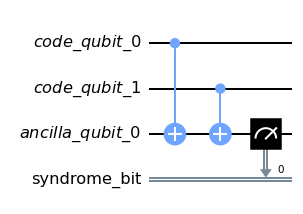

In [7]:
from qiskit import QuantumRegister, ClassicalRegister

cq = QuantumRegister(2,'code_qubit')
lq = QuantumRegister(1,'ancilla_qubit')
sb = ClassicalRegister(1,'syndrome_bit')
qc = QuantumCircuit(cq,lq,sb)
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
qc.measure(lq,sb)
qc.draw()

Здесь у нас есть три физических кубита. Два из них называются «кодовыми кубитами», а другой — «вспомогательным кубитом». Извлекается один бит вывода, называемый битом синдрома. Вспомогательный кубит всегда инициализируется в состоянии $\left|0\right\rangle$. Однако кодовые кубиты могут быть инициализированы в разных состояниях. Чтобы увидеть, как разные входные данные влияют на выходные данные, мы можем создать схему `qc_init` , которая подготавливает кодовые кубиты к некоторому состоянию, а затем запустить схему `qc_init+qc` .

Во-первых, тривиальный случай: `qc_init` ничего не делает, поэтому кубиты кода изначально равны $\left|00\right\rangle$.

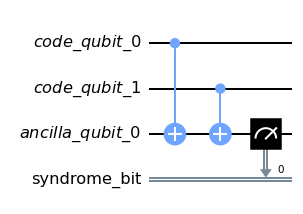

In [8]:
qc_init = QuantumCircuit(cq)

(qc_init+qc).draw()

In [9]:
counts = execute( qc_init+qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


Результат во всех случаях равен `0` .

Теперь давайте попробуем начальное состояние $\left|11\right\rangle$.

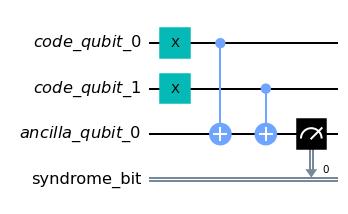

In [10]:
qc_init = QuantumCircuit(cq)
qc_init.x(cq)

(qc_init+qc).draw()

In [11]:
counts = execute(qc_init+qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


Результат в этом случае также всегда равен `0` . Учитывая линейность квантовой механики, мы можем ожидать, что то же самое будет верно и для любой суперпозиции $\left|00\right\rangle$ и $\left|11\right\rangle$, как в примере ниже.

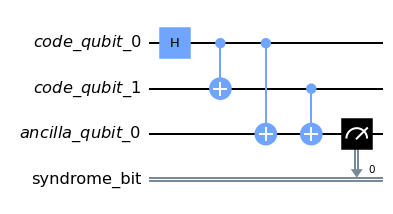

In [12]:
qc_init = QuantumCircuit(cq)
qc_init.h(cq[0])
qc_init.cx(cq[0],cq[1])

(qc_init+qc).draw()

In [13]:
counts = execute(qc_init+qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


Противоположный результат будет получен для начального состояния $\left|01\right\rangle$, $\left|10\right\rangle$ или любой их суперпозиции.

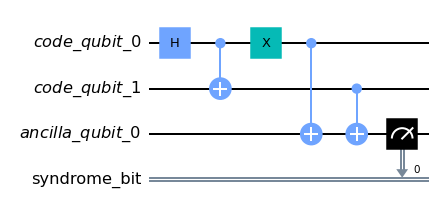

In [14]:
qc_init = QuantumCircuit(cq)
qc_init.h(cq[0])
qc_init.cx(cq[0],cq[1])
qc_init.x(cq[0])

(qc_init+qc).draw()

In [15]:
counts = execute(qc_init+qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:',counts)

Results: {'1': 1024}


В таких случаях на выходе всегда `'1'` .

Таким образом, это измерение говорит нам о коллективном свойстве нескольких кубитов. В частности, он просматривает два кубита кода и определяет, являются ли их состояния одинаковыми или разными в z-базисе. Для базовых состояний, одинаковых по оси z, таких как $\left|00\right\rangle$ и $\left|11\right\rangle$, измерение просто возвращает `0` . Это также относится к любой их суперпозиции. Поскольку он никак не различает эти состояния, он и не разрушает такую суперпозицию.

Точно так же для базисных состояний, которые отличаются по z, возвращается `1` . Это происходит для $\left|01\right\rangle$, $\left|10\right\rangle$ или любой их суперпозиции.

Теперь предположим, что мы применяем такое «измерение синдрома» ко всем парам физических кубитов в нашем коде повторения. Если их состояние описывается повторяющимся $\left|0\right\rangle$, повторяющимся $\left|1\right\rangle$ или любой их суперпозицией, все измерения синдрома вернут `0` . Учитывая этот результат, мы будем знать, что наши состояния действительно закодированы в повторяющихся состояниях, какими мы хотим, чтобы они были, и можем сделать вывод, что ошибок не произошло. Однако, если некоторые измерения синдрома возвращают `1` , это признак ошибки. Поэтому мы можем использовать эти результаты измерений, чтобы определить, как расшифровать результат.

### Код квантового повторения

Теперь мы знаем достаточно, чтобы понять, как именно реализуется квантовая версия кода повторения.

Мы можем использовать его в Qiskit, импортировав необходимые инструменты из Ignis.

In [16]:
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import lookuptable_decoding
from qiskit.ignis.verification.topological_codes import GraphDecoder

Мы вольны выбирать, сколько физических кубитов мы хотим, чтобы логический кубит был закодирован. Мы также можем выбрать, сколько раз будут применяться измерения синдрома, пока мы сохраняем наш логический кубит, перед окончательным измерением считывания. Начнем с самого маленького нетривиального случая: три повторения и один раунд измерения синдрома. Схемы для кода повторения затем могут быть созданы автоматически с использованием объекта `RepetitionCode` из Qiskit-Ignis.

In [17]:
n = 3
T = 1

code = RepetitionCode(n,T)

При этом мы можем проверять различные свойства кода, такие как имена регистров кубитов, используемых для кода и вспомогательных кубитов.

`RepetitionCode` содержит две квантовые схемы, реализующие код: по одной для каждого из двух возможных значений логических битов. Вот они для логических `0` и `1` соответственно.

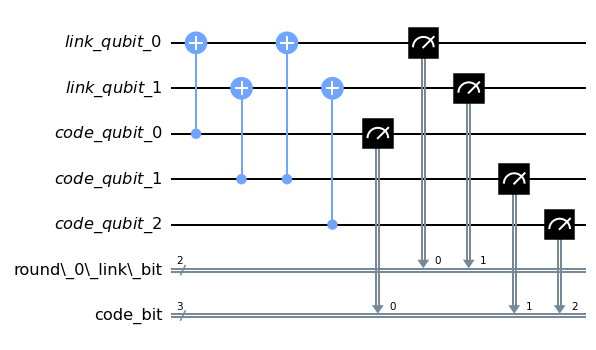

In [18]:
code.circuit['0'].draw()

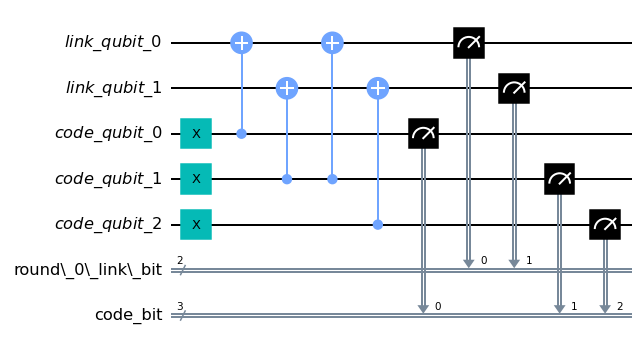

In [19]:
code.circuit['1'].draw()

В этих схемах у нас есть два типа физических кубитов. Существуют «кодовые кубиты», которые представляют собой три физических кубита, в которых кодируется логическое состояние. Существуют также «кубиты связи», которые служат вспомогательными кубитами для измерения синдрома.

Наш единственный раунд измерений синдрома в этих схемах состоит всего из двух измерений синдрома. Один сравнивает кодовые кубиты 0 и 1, а другой сравнивает кодовые кубиты 1 и 2. Можно было бы ожидать, что для создания полного набора потребуется дальнейшее измерение, сравнивающее кодовые кубиты 0 и 2. Тем не менее, этих двух достаточно. Это связано с тем, что информацию о том, имеют ли 0 и 2 одинаковое базисное состояние z, можно вывести из той же информации о 0 и 1, что и для 1 и 2. Действительно, для $n$ кубитов мы можем получить необходимую информацию из просто измерения синдрома $n-1$ соседних пар кубитов.

Запуск этих схем на симуляторе без шума приводит к очень простым результатам.

In [20]:
def get_raw_results(code,noise_model=None):

    circuits = code.get_circuit_list()
    raw_results = {}
    for log in range(2):
        job = execute( circuits[log], Aer.get_backend('qasm_simulator'), noise_model=noise_model)
        raw_results[str(log)] = job.result().get_counts(str(log))
    return raw_results

raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical',log,':',raw_results[log],'\n')

Logical 0 : {'000 00': 1024} 

Logical 1 : {'111 00': 1024} 



Здесь мы видим, что вывод состоит из двух частей. Часть справа содержит результаты двух измерений синдрома. Тот, что слева, содержит результаты трех последних измерений кодовых кубитов.

Для большего количества раундов измерения, например, $T=4$, у нас будут результаты большего количества измерений синдрома справа.

In [21]:
code = RepetitionCode(n,4)

raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical',log,':',raw_results[log],'\n')

Logical 0 : {'000 00 00 00 00': 1024} 

Logical 1 : {'111 00 00 00 00': 1024} 



Для большего количества повторений, например, $n=5$, каждый набор измерений будет больше. Последнее измерение слева будет состоять из $n$ кубитов. Каждое измерение синдрома $T$ будет состоять из $n-1$ возможных соседних пар.

In [22]:
code = RepetitionCode(5,4)

raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical',log,':',raw_results[log],'\n')

Logical 0 : {'00000 0000 0000 0000 0000': 1024} 

Logical 1 : {'11111 0000 0000 0000 0000': 1024} 



### Расшифровка таблицы поиска

Теперь вернемся к примеру $n=3$, $T=1$ и рассмотрим случай с небольшим шумом.

In [23]:
code = RepetitionCode(3,1)

noise_model = get_noise(0.05,0.05)

raw_results = get_raw_results(code,noise_model)
for log in raw_results:
    print('Logical',log,':',raw_results[log],'\n')

Logical 0 : {'000 00': 660, '000 01': 75, '100 00': 47, '100 01': 6, '100 10': 4, '101 00': 7, '110 00': 4, '110 01': 2, '111 00': 2, '000 10': 66, '000 11': 3, '001 00': 55, '001 01': 6, '001 10': 2, '010 00': 49, '010 01': 22, '010 10': 6, '010 11': 2, '011 00': 3, '011 01': 2, '011 11': 1} 

Logical 1 : {'100 00': 3, '100 01': 1, '100 10': 2, '100 11': 1, '101 00': 55, '101 01': 20, '101 10': 5, '101 11': 15, '110 00': 56, '110 01': 21, '110 10': 7, '110 11': 3, '111 00': 613, '111 01': 61, '111 10': 65, '111 11': 7, '001 00': 3, '001 01': 3, '001 10': 1, '001 11': 2, '010 00': 3, '010 01': 2, '010 10': 4, '011 00': 34, '011 01': 10, '011 10': 24, '011 11': 3} 



Здесь мы создали `raw_results` , словарь, который содержит как результаты для схемы, кодирующей логический `0` , так и `1` , закодированную для логической `1` .

Наша задача при столкновении с любым из возможных результатов, которые мы здесь видим, состоит в том, чтобы определить, каким должен был быть результат, если бы не было шума. Для результата `'000 00'` или `'111 00'` ответ очевиден. Это результаты, которые мы только что видели для логического `0` и логической `1` соответственно, когда ошибок не возникает. Первое является наиболее распространенным результатом для логического `0` даже с шумом, а второе — наиболее распространенным для логической `1` . Таким образом, мы придем к выводу, что результат действительно был таким же, как и для логического `0` всякий раз, когда мы встречаем `'000 00'` , и таким же для логической `1` , когда мы встречаем `'111 00'` .

Хотя эта тактика оптимальна, тем не менее, она может потерпеть неудачу. Обратите внимание, что `'111 00'` обычно встречается в нескольких случаях для закодированного `0` , а `'000 00'` аналогично встречается для закодированного `1` . В этом случае не по нашей вине мы неправильно декодируем вывод. В этих случаях большое количество ошибок сговорились, чтобы создать впечатление, что мы имеем бесшумный случай противоположного логического значения, и поэтому исправление становится невозможным.

Мы можем использовать аналогичную тактику для декодирования всех других результатов. Результат `'001 00'` , например, гораздо чаще встречается для логического `0` , чем для логической `1` . Это связано с тем, что в первом случае это может быть вызвано всего одной ошибкой измерения (которая неверно сообщает, что один `0` равен `1` ), но во втором случае потребуется как минимум две ошибки. Поэтому всякий раз, когда мы видим `'001 00'` , мы можем декодировать его как логический `0` .

Применение этой тактики ко всем строкам является формой так называемого «декодирования таблицы поиска». Здесь анализируется каждый возможный результат и определяется наиболее вероятное значение для его декодирования. Для многих кубитов это быстро становится неразрешимым, поскольку количество возможных результатов становится очень большим. В этих случаях необходимы более алгоритмические декодеры. Однако декодирование интерполяционной таблицы хорошо подходит для тестирования небольших кодов.

Мы можем использовать инструменты в Qiskit для реализации декодирования таблицы поиска для любого кода. Для этого нам понадобятся два набора результатов. Одним из них является набор результатов, которые мы действительно хотим декодировать и для которых мы хотим вычислить вероятность неправильного декодирования, $P$. Для этого мы будем использовать уже имеющиеся у нас `raw_results` .

Другой набор результатов используется в качестве таблицы поиска. Это нужно будет запустить для большого количества выборок, чтобы гарантировать получение хорошей статистики для каждого возможного результата. Мы будем использовать `shots=10000` .


In [24]:
circuits = code.get_circuit_list()
table_results = {}
for log in range(2):
    job = execute( circuits[log], Aer.get_backend('qasm_simulator'), noise_model=noise_model, shots=10000 )
    table_results[str(log)] = job.result().get_counts(str(log))

С этими данными, которые мы называем `table_results` , теперь мы можем использовать функцию `lookuptable_decoding` из Qiskit. Это берет каждый результат из `raw_results` и декодирует его с информацией в `table_results` . Затем он проверяет правильность декодирования и использует эту информацию для вычисления $P$.

In [25]:
P = lookuptable_decoding(raw_results,table_results)
print('P =',P)

P = {'0': 0.0194, '1': 0.028}


Здесь мы видим, что значения для $P$ ниже, чем для $p_{meas}$ и $p_{gate}$, поэтому мы получаем повышение надежности хранения значения бита. Также обратите внимание, что значение $P$ для закодированной `1` выше, чем для `0` . Это связано с тем, что кодирование `1` требует применения вентилей `x` , которые являются дополнительным источником шума.

### Теоретико-графовое декодирование

Рассмотренное выше декодирование дает наилучшие возможные результаты и делает это без необходимости использования каких-либо деталей кода. Однако у него есть главный недостаток, который сводит на нет эти преимущества: таблица поиска экспоненциально растет по мере увеличения размера кода. По этой причине декодирование обычно выполняется более алгоритмическим способом, учитывающим структуру кода и возникающие в результате синдромы.

Для кодов `topological_codes` эта структура выявляется с помощью постобработки синдромов. Вместо использования формы, показанной выше, с окончательным измерением кубитов кода слева и выводами раундов измерения синдрома справа, мы используем метод `process_results` объекта кода, чтобы переписать их в другой форме.

Например, ниже представлена обработанная форма словаря `raw_results` , в данном случае для $n=3$ и $T=2$. Для ясности показаны только результаты с 50 или более образцами.

In [26]:
code = RepetitionCode(3,2)

raw_results = get_raw_results(code,noise_model)

results = code.process_results( raw_results )

for log in ['0','1']:
    print('\nLogical ' + log + ':')
    print('raw results       ', {string:raw_results[log][string] for string in raw_results[log] if raw_results[log][string]>=50 })
    print('processed results ', {string:results[log][string] for string in results[log] if results[log][string]>=50 })


Logical 0:
raw results        {'000 00 00': 476, '000 01 00': 58, '000 10 00': 55}
processed results  {'0 0  00 00 00': 476, '0 0  00 01 01': 58, '0 0  00 10 10': 55}

Logical 1:
raw results        {'111 00 00': 427, '111 00 01': 51}
processed results  {'1 1  00 00 00': 427, '1 1  01 01 00': 51}


Здесь мы видим, что `'000 00 00'` было преобразовано в `'0 0 00 00 00'` , а `'111 00 00'` в `'1 1 00 00 00'` и так далее.

В этих новых строках `0 0` слева для результатов логического `0` и `1 1` слева от результатов логической `1` являются логическим выводом. Для этого считывания можно использовать любой кодовый кубит, поскольку все они должны (без ошибок) быть равными. Следовательно, в принципе возможно иметь только один `0` или `1` в этой позиции. Мы также могли бы поступить так же, как и в исходной форме результата, и получить $n$, по одному на каждый кубит. Вместо этого мы используем два из двух кубитов на каждом конце линии. Причина этого будет показана позже. При отсутствии ошибок эти два значения всегда будут равны, поскольку они представляют одно и то же закодированное битовое значение.

После логических значений следуют $n-1$ результаты измерений синдрома для первого раунда. `0` означает, что соответствующая пара кубитов имеет одинаковое значение, а `1` означает, что они отличаются друг от друга. Результатов $n-1$, потому что строка из $d$ кодовых кубитов имеет $n-1$ возможных соседних пар. При отсутствии ошибок все они будут равны `0` . Это точно так же, как первый такой набор синдромов возникает из исходной формы результата.

Следующий блок — это очередной раунд результатов синдрома. Однако вместо того, чтобы представлять эти результаты напрямую, он дает нам изменение синдрома между первым и вторым раундами. Следовательно, это побитовое `OR` результатов измерения синдрома из второго раунда с результатами из первого. При отсутствии ошибок все они будут равны `0` .

Все последующие блоки следуют той же формуле, хотя последний из всех требует некоторого комментария. Это не измеряется стандартным методом (с кубитом связи). Вместо этого он рассчитывается на основе окончательного измерения всех кодовых кубитов. Опять же это представлено как изменение синдрома, и будет все `0` при отсутствии ошибок. Это $T+1$-й блок измерения синдрома, так как он выполняется не так, как остальные, и не входит в число раундов измерения синдрома $T$.

Следующие примеры дополнительно иллюстрируют это соглашение.

**Пример 1:** `0 0 0110 0000 0000` представляет собой повторный код $d=5$, $T=2$ с закодированным `0` . Синдром показывает, что (скорее всего) кубит среднего кода был перевернут ошибкой перед первым раундом измерения. Это приводит к тому, что он не согласуется с обоими соседними кодовыми кубитами для остальной части схемы. Это показано синдромом в первом раунде, но блоки для последующих раундов не сообщают об этом, поскольку он больше не представляет изменения. Другие наборы ошибок также могли вызвать этот синдром, но они должны были быть более сложными и, по-видимому, менее вероятными.

**Пример 2:** `0 0 0010 0010 0000` представляет собой повторный код $d=5$, $T=2$ с закодированным `0` . Здесь одно из измерений синдрома сообщило о разнице между двумя кодовыми кубитами в первом раунде, что привело к `1` . В следующем раунде такого эффекта не было, поэтому результат был `0` . Однако, поскольку это не согласуется с предыдущим результатом для того же измерения синдрома, и поскольку мы отслеживаем изменения синдрома, это изменение приводит к еще одному `1` . Последующие раунды также ничего не обнаруживают, но это больше не представляет собой изменение и, следовательно, приводит к `0` в той же позиции. Скорее всего результат измерения, ведущий к первой `1` , был ошибкой.

**Пример 3:** `0 1 0000 0001 0000` представляет собой повторный код $d=5$, $T=2$ с закодированной `1` . Кодовый кубит в конце строки переворачивается перед вторым этапом измерения синдрома. Это определяется только одним измерением синдрома, потому что оно находится в конце линии. По той же причине нарушается и один из логических выводов.

Обратите внимание, что во всех этих примерах одна ошибка приводит к тому, что ровно два символа в строке изменяются по сравнению со значением, которое они имели бы без ошибок. Это определяющая особенность соглашения, используемого для представления стабилизаторов в `topological_codes` . Он используется для определения графа, на котором определяется задача декодирования.

В частности, граф строится, сначала беря схему, кодирующую логический `0` , для которого все битовые значения в выходной строке должны быть `0` . Многие его копии затем создаются и запускаются на симуляторе, в каждый из которых вставляется отдельный оператор Паули. Это делается для каждого из трех типов операторов Паули на каждом из кубитов и на каждой глубине схемы. Выходные данные каждой из этих схем можно использовать для определения последствий каждой возможной одиночной ошибки. Поскольку схема содержит только операции Клиффорда, моделирование может быть выполнено эффективно.

В каждом случае ошибка изменит ровно два символа (если только это не повлияет). Затем строится граф, в котором каждый бит выходной строки соответствует узлу, а пары битов, затронутых одной и той же ошибкой, соответствуют ребру.

Процесс декодирования конкретной выходной строки обычно требует, чтобы алгоритм определял, какой набор ошибок произошел, учитывая синдром, обнаруженный в выходной строке. Это можно сделать, построив второй граф, содержащий только узлы, соответствующие битам нетривиального синдрома в выходных данных. Затем между каждой парой узлов размещается ребро с соответствующим весом, равным длине минимального пути между этими узлами в исходном графе. Тогда набор ошибок, согласующийся с синдромом, соответствует нахождению идеального соответствия этого графа. Чтобы сделать вывод о наиболее вероятном наборе ошибок, хорошей тактикой было бы найти набор с наименьшим возможным количеством ошибок, который согласуется с наблюдаемым синдромом. Это соответствует минимальному весовому идеальному паросочетанию графа.

Использование идеального соответствия с минимальным весом является стандартным методом декодирования кода повторения и поверхностного кода и реализовано в Qiskit Ignis. Его также можно использовать в других случаях, таких как цветовые коды, но он не находит наилучшего приближения наиболее вероятного набора ошибок для каждого кода и модели шума. По этой причине могут использоваться другие методы декодирования, основанные на том же графе. `GraphDecoder` Qiskit Ignis вычисляет эти графики для заданного кода и предоставляет ряд методов для его анализа. На момент написания статьи реализовано только идеальное соответствие минимального веса.

Обратите внимание, что для таких кодов, как поверхностный код, не совсем верно то, что каждая отдельная ошибка изменит значение только двух битов в выходной строке. Ошибка $\sigma^y$, например, перевернет пару значений, соответствующих двум разным типам стабилизаторов, которые обычно декодируются независимо. Таким образом, выходные данные для этих кодов будут представлены таким образом, который признает это, и анализ таких синдромов, соответственно, создаст несколько независимых графиков для представления различных типов синдромов.

## Запуск процедуры бенчмаркинга повторяющегося кода

Теперь мы запустим примеры повторяющихся кодов на реальных устройствах и будем использовать результаты в качестве эталона. Во-первых, мы кратко подытожим процесс. Это относится к этому примеру кода повторения, а также к другим процедурам бенчмаркинга в `topological_codes` и вообще к Qiskit Ignis. В каждом случае используется следующий трехэтапный процесс.

1. Задача определена. Qiskit Ignis определяет набор цепей, которые необходимо запустить, и создает их.
2. Цепи запущены. Обычно это делается с помощью Qiskit. Однако, в принципе, любое служебное или экспериментальное оборудование может быть сопряжено.
3. Qiskit Ignis используется для обработки результатов схем, чтобы создать вывод, необходимый для данной задачи.

Для `topological_codes` шаг 1 требует выбора типа и размера кода квантовой коррекции ошибок. Каждому типу кода соответствует отдельный класс Python. Соответствующий объект инициализируется путем предоставления требуемых параметров, таких как `n` и `T` для объекта `RepetitionCode` . Результирующий объект затем содержит схемы, соответствующие заданному коду, кодирующему простые логические состояния кубита (например, $\left|0\right\rangle$ и $\left|1\right\rangle$), а затем запускает процедуру ошибки обнаружение в течение определенного количества раундов перед окончательным считыванием в простой логической основе (обычно стандартное измерение $\left|0\right\rangle$ / $\left|1\right\rangle$).

Для `topological_codes` основной обработкой шага 3 является декодирование, которое направлено на устранение любых ошибок в окончательном считывании с использованием информации, полученной при обнаружении ошибок. Оптимальный алгоритм декодирования обычно варьируется в зависимости от кода. Однако коды с похожей структурой часто используют аналогичные методы.

Цель `topological_codes` — предоставить множество методов декодирования, реализованных таким образом, чтобы все декодеры можно было использовать для всех кодов. Это делается путем ограничения кодов, декодирование которых можно описать как теоретико-графовую задачу минимизации. Этим классическим примером таких кодов являются торические и поверхностные коды. Свойство также разделяют двухмерные цветовые коды и соответствующие коды. Все они являются яркими примерами так называемых топологических квантовых кодов с исправлением ошибок, что привело к названию подпакета. Однако обратите внимание, что не все топологические коды совместимы с таким декодером. Кроме того, некоторые нетопологические коды будут совместимы, например код повторения.

Декодирование выполняется классом `GraphDecoder` . Соответствующий объект инициализируется предоставлением объекта кода, для которого будет выполняться декодирование. Затем это используется для определения графа, на котором будет определена проблема декодирования. Затем результаты могут быть обработаны с использованием различных методов объекта декодера.

Далее мы увидим, как приведенные выше идеи применяются на практике для повторяющегося кода. При этом мы будем использовать две логические переменные, `step_2` и `step_3` . Переменная `step_2` используется, чтобы показать, какие части программы необходимо запустить при получении данных с устройства, а `step_3` используется, чтобы показать части, которые обрабатывают полученные данные.

Для обоих по умолчанию установлено значение false, чтобы гарантировать, что все приведенные ниже фрагменты программы могут быть запущены с использованием только ранее собранных и обработанных данных. Однако для получения новых данных нужно использовать только `step_2 = True` , а для декодирования любых данных нужно использовать только `step_3 = True` .

In [27]:
step_2 = False
step_3 = False

Чтобы протестировать реальное устройство, нам нужны инструменты, необходимые для доступа к этому устройству через облако, и компиляция схем, подходящих для работы на нем. Они импортируются следующим образом.

In [28]:
from qiskit import IBMQ
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

Теперь мы можем создать внутренний объект, который используется для запуска цепей. Это делается путем предоставления строки, используемой для указания устройства. Здесь используется `'ibmq_16_melbourne'` , который на момент написания имеет 15 активных кубитов. Мы также рассмотрим 53-кубитное устройство *Rochester* , указанное с помощью `'ibmq_rochester'` .

In [29]:
device_name = 'ibmq_16_melbourne'

if step_2:
    
    IBMQ.load_account()
    
    for provider in IBMQ.providers():
        for potential_backend in provider.backends():
            if potential_backend.name()==device_name:
                backend = potential_backend

    coupling_map = backend.configuration().coupling_map

При запуске схемы на реальном устройстве сначала реализуется процесс транспиляции. Это изменяет вентили схемы на собственный набор вентилей, реализуемый устройством. В некоторых случаях эти изменения довольно тривиальны, например, выражение каждого Адамара как поворота одного кубита с помощью соответствующих углов Эйлера. Однако изменения могут быть более серьезными, если схема не учитывает возможность подключения устройства. Например, предположим, что для схемы требуется управляемое НЕ, которое не реализовано устройством напрямую. Затем эффект необходимо воспроизвести с помощью таких методов, как использование дополнительных вентилей с управляемым НЕ для перемещения состояний кубита. Помимо введения дополнительного шума, это также делокализует любой уже присутствующий шум. Ошибка в одном кубите в исходной схеме могла превратиться в мультикубитное чудовище под действием дополнительной транспиляции. Поэтому такая нетривиальная транспиляция должна быть предотвращена при работе схем квантовой коррекции ошибок.

Тесты кода повторения требуют эффективного упорядочения кубитов вдоль линии. Единственные требуемые логические элементы «управляемое НЕ» находятся между соседями по этой линии. Поэтому наша первая задача — изучить карту связи устройства и найти линию.

![Рис. 1. Карта связи устройства IBM Q Melbourne.](images/melbourne.png)

Для Мельбурна можно найти линию, покрывающую все 15 кубитов. Выбор, указанный в `line` списка ниже, предназначен для того, чтобы избежать наиболее подверженных ошибкам вентилей `cx` . Для 53-кубитного устройства *Rochester* нет единой линии, которая покрывает все 53 кубита. Вместо этого мы можем использовать следующий выбор, который покрывает 43.

In [30]:
if device_name=='ibmq_16_melbourne':
    line = [13,14,0,1,2,12,11,3,4,10,9,5,6,8,7]
elif device_name=='ibmq_rochester':
    line = [10,11,17,23,22,21,20,19,16,7,8,9,5]#,0,1,2,3,4,6,13,14,15,18,27,26,25,29,36,37,38,41,50,49,48,47,46,45,44,43,42,39,30,31]

Теперь, когда мы знаем, к скольким кубитам у нас есть доступ, мы можем создать объекты кода повторения для каждого кода, который мы будем запускать. Обратите внимание, что код с `n` повторениями использует $n$ кубитов кода и $n-1$ кубитов ссылок, и, таким образом, всего $2n-1$.

In [31]:
n_min = 3
n_max = int((len(line)+1)/2)

code = {}

for n in range(n_min,n_max+1):
    code[n] = RepetitionCode(n,1)

Прежде чем запускать схемы из этих кодов, нам нужно убедиться, что транспилятор знает, какие физические кубиты на устройстве он должен использовать. Это означает использование кубита `line[0]` в качестве первого кубита кода, кубита `line[1]` в качестве первого кубита ссылки и так далее. Это делается с помощью следующей функции, которая принимает объект кода повторения и `line` и создает словарь Python, чтобы указать, какой кубит кода соответствует какому элементу строки.

In [32]:
def get_initial_layout(code,line):
    initial_layout = {}
    for j in range(n):
        initial_layout[code.code_qubit[j]] = line[2*j]
    for j in range(n-1):
        initial_layout[code.link_qubit[j]] = line[2*j+1]
    return initial_layout

Теперь мы можем транспилировать схемы, чтобы создать схемы, которые фактически будут запускаться устройством. Также проводится проверка, чтобы убедиться, что транспиляция действительно не привела к нетривиальным эффектам за счет увеличения количества кубитов. Кроме того, скомпилированные схемы собираются в единый список, что позволяет отправить их все сразу в одном и том же пакетном задании.

In [33]:
if step_2:
    
    circuits = []
    for n in range(n_min,n_max+1):
        initial_layout = get_initial_layout(code[n],line)
        for log in ['0','1']:
            circuits.append( transpile(code[n].circuit[log], backend=backend, initial_layout=initial_layout) )
            num_cx = dict(circuits[-1].count_ops())['cx']
            assert num_cx==2*(n-1), str(num_cx) + ' instead of ' + str(2*(n-1)) + ' cx gates for n = ' + str(n)

Теперь мы готовы приступить к работе. Как и в случае уже рассмотренных смоделированных заданий, результаты этого извлекаются в словарь `raw_results` . Однако в этом случае он расширен для хранения результатов кодов разного размера. Это означает, что `raw_results[n]` в дальнейшем эквивалентен одному из словарей `raw_results` , использованных ранее, для заданного `n` .

In [34]:
if step_2:
    
    job = execute(circuits,backend,shots=8192)

    raw_results = {}
    j = 0
    for d in range(n_min,n_max+1):
        raw_results[d] = {}
        for log in ['0','1']:
            raw_results[d][log] = job.result().get_counts(j)
            j += 1

Может быть удобно сохранить данные в файл, чтобы можно было выполнить или повторить обработку шага 3 позднее.

In [35]:
if step_2: # save results
    with open('results/raw_results_'+device_name+'.txt', 'w') as file:
        file.write(str(raw_results))
elif step_3: # read results
    with open('results/raw_results_'+device_name+'.txt', 'r') as file:
        raw_results = eval(file.read())

Как мы видели ранее, процесс декодирования сначала требует перезаписи результатов, чтобы синдром мог быть выражен в правильной форме. Таким образом, метод `process_results` каждого объекта кода повторения code `code[n]` используется для создания словаря `results[n]` из каждого `raw_results[n]` .

In [36]:
if step_3:
    results = {}
    for n in range(n_min,n_max+1):
        results[n] = code[n].process_results( raw_results[n] )

Декодирование также требует от нас настройки объекта `GraphDecoder` для каждого кода. Их инициализация включает в себя построение графа, соответствующего синдрому, как описано в последнем разделе.

In [37]:
if step_3:
    dec = {}
    for n in range(n_min,n_max+1):
        dec[n] = GraphDecoder(code[n])

Наконец, объект декодера можно использовать для обработки результатов. Здесь используется алгоритм по умолчанию, идеальное соответствие минимального веса. Конечным результатом является расчет вероятности логической ошибки. При выполнении шага 3 следующий фрагмент также сохраняет вероятности логических ошибок. В противном случае он считывает ранее сохраненные вероятности.

In [ ]:
if step_3:
    
    logical_prob_match = {}
    for n in range(n_min,n_max+1):
        logical_prob_match[n] = dec[n].get_logical_prob(results[n])
        
    with open('results/logical_prob_match_'+device_name+'.txt', 'w') as file:
        file.write(str(logical_prob_match))
        
else:
    with open('results/logical_prob_match_'+device_name+'.txt', 'r') as file:
        logical_prob_match = eval(file.read())

Результирующие вероятности логических ошибок показаны на следующем графике, который использует логарифмическую шкалу, используемую на оси y. Можно ожидать, что вероятность логической ошибки экспоненциально убывает с ростом $n$. Если это так, это является подтверждением того, что устройство совместимо с этим базовым тестом квантовой коррекции ошибок. Если нет, это означает, что кубиты и вентили недостаточно надежны.

К счастью, результаты прототипов устройств IBM Q обычно показывают ожидаемый экспоненциальный спад. Из приведенных ниже результатов видно, что небольшие коды представляют собой исключение из этого правила. Можно ожидать и других отклонений, например, когда увеличение размера кода включает группу кубитов либо с исключительно низким, либо с высоким уровнем шума.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = range(n_min,n_max+1)
P = { log: [logical_prob_match[n][log] for n in x_axis] for log in ['0', '1'] }

ax = plt.gca()
plt.xlabel('Code distance, n')
plt.ylabel('ln(Logical error probability)')
ax.scatter( x_axis, P['0'], label="logical 0")
ax.scatter( x_axis, P['1'], label="logical 1")
ax.set_yscale('log')
ax.set_ylim(ymax=1.5*max(P['0']+P['1']),ymin=0.75*min(P['0']+P['1']))
plt.legend()

plt.show()

Еще одно понимание, которое мы можем получить, заключается в том, чтобы использовать результаты для определения вероятности возникновения определенных ошибочных процессов.

Для этого мы используем тот факт, что каждое ребро в графе синдрома представляет определенную форму ошибки, возникающую на конкретном кубите в конкретной точке схемы. Это единственная единственная ошибка, которая приводит к изменению значений синдрома, соответствующих обоим соседним узлам. Таким образом, использование результатов для оценки вероятности такого синдрома позволяет нам оценить вероятность такого ошибочного события. В частности, для первого порядка ясно, что

$$ \frac{p}{1-p} \ приблизительно \frac{C_{11}}{C_{00}} $$

Здесь $p$ — вероятность ошибки, соответствующей конкретному ребру, $C_{11}$ — количество отсчетов в `results[n]['0']` соответствующее значению синдрома обоих соседних узлов, равному `1` , и $C_{00}$ одинаково для них обоих равно `0` .

В объекте декодера есть метод `weight_syndrome_graph` , который определяет эти соотношения и присваивает каждому ребру вес $-\ln(p/(1-p))$. Используя этот метод и проверяя веса, мы можем легко получить эти вероятности.

In [ ]:
if step_3:

    dec[n_max].weight_syndrome_graph(results=results[n_max])

    probs = []
    for edge in dec[n_max].S.edges:
        ratio = np.exp(-dec[n_max].S.get_edge_data(edge[0],edge[1])['distance'])
        probs.append( ratio/(1+ratio) )
        
    with open('results/probs_'+device_name+'.txt', 'w') as file:
        file.write(str(probs))
        
else:
    
    with open('results/probs_'+device_name+'.txt', 'r') as file:
        probs = eval(file.read())

Вместо того, чтобы отображать полный список, мы можем получить сводку через среднее значение, стандартное отклонение, минимум, максимум и квартили.

In [ ]:
import pandas as pd

pd.Series(probs).describe().to_dict()

Сравнительный анализ устройств не дает абсолютно эквивалентного набора вероятностей ошибок. Тем не менее, вероятности ошибок считывания и ошибок контролируемого НЕ могут служить хорошим сравнением. В частности, мы можем использовать `backend` -объект для получения этих значений из бенчмаркинга.

In [ ]:
if step_3:

    gate_probs = []
    for j,qubit in enumerate(line):
        
        gate_probs.append( backend.properties().readout_error(qubit) )
        
        cx1,cx2 = 0,0
        if j>0:
            gate_probs( backend.properties().gate_error('cx',[qubit,line[j-1]]) )
        if j<len(line)-1:
            gate_probs( backend.properties().gate_error('cx',[qubit,line[j+1]]) )
                
    with open('results/gate_probs_'+device_name+'.txt', 'w') as file:
        file.write(str(gate_probs))
        
else:
    
    with open('results/gate_probs_'+device_name+'.txt', 'r') as file:
        gate_probs = eval(file.read())
    
pd.Series(gate_probs).describe().to_dict()

In [ ]:
import qiskit
qiskit.__qiskit_version__